In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

In [2]:
# import python libraries
import numpy as np # mathematical use
import pandas as pd # dataframe
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sn
import os
from scipy import stats

In [3]:
current_dir = os.getcwd()
file_path = current_dir + "/Walmart Sales.xlsx"
print(file_path)

C:\Users\Shivangi\Downloads\Data Analyst Assigment@jar/Walmart Sales.xlsx


In [4]:
df=pd.read_excel(file_path) #import Excel file

In [5]:
df.shape # no. of row and column

(1000, 12)

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


**DATA CLEANING**

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Table:")
print(missing_values)

Missing Values Table:
Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


In [9]:
#  Check data types
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Date              object
Time              object
Payment           object
Rating           float64
dtype: object


In [10]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Check for duplicate values
duplicates = df.duplicated()
print("duplicates Values in a Table:")
print(duplicates)

duplicates Values in a Table:
0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [12]:
df.describe() #Summary statistics of numerical columns

,Unit price,Quantity,Date,Rating
count,1000.000000,1000.000000,1000,1000.00000
mean,55.672130,5.510000,2019-02-14 00:05:45.600000,6.97270
min,10.080000,1.000000,2019-01-01 00:00:00,4.00000
25%,32.875000,3.000000,2019-01-24 00:00:00,5.50000
50%,55.230000,5.000000,2019-02-13 00:00:00,7.00000
75%,77.935000,8.000000,2019-03-08 00:00:00,8.50000
max,99.960000,10.000000,2019-03-30 00:00:00,10.00000
std,26.494628,2.923431,NaN,1.71858


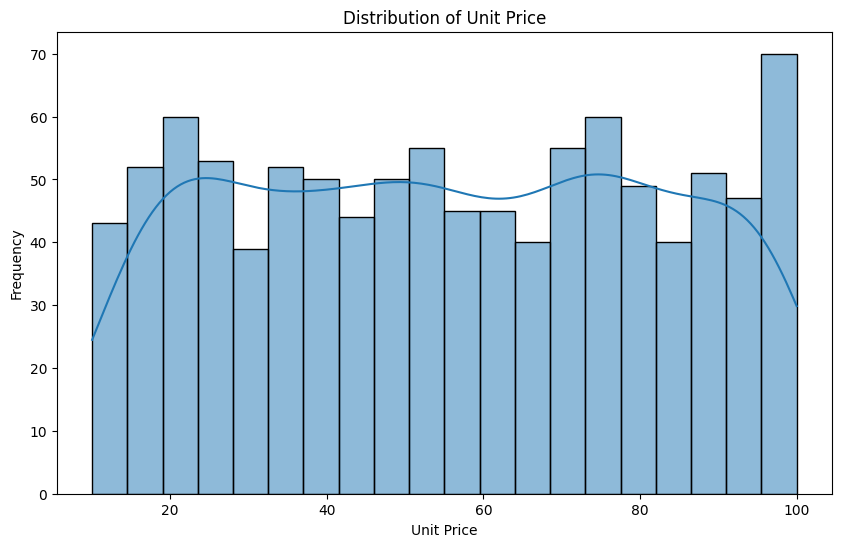

In [15]:
# Visualize distribution of numerical variables
plt.figure(figsize=(10, 6))
sn.histplot(df['Unit price'], bins=20, kde=True)
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

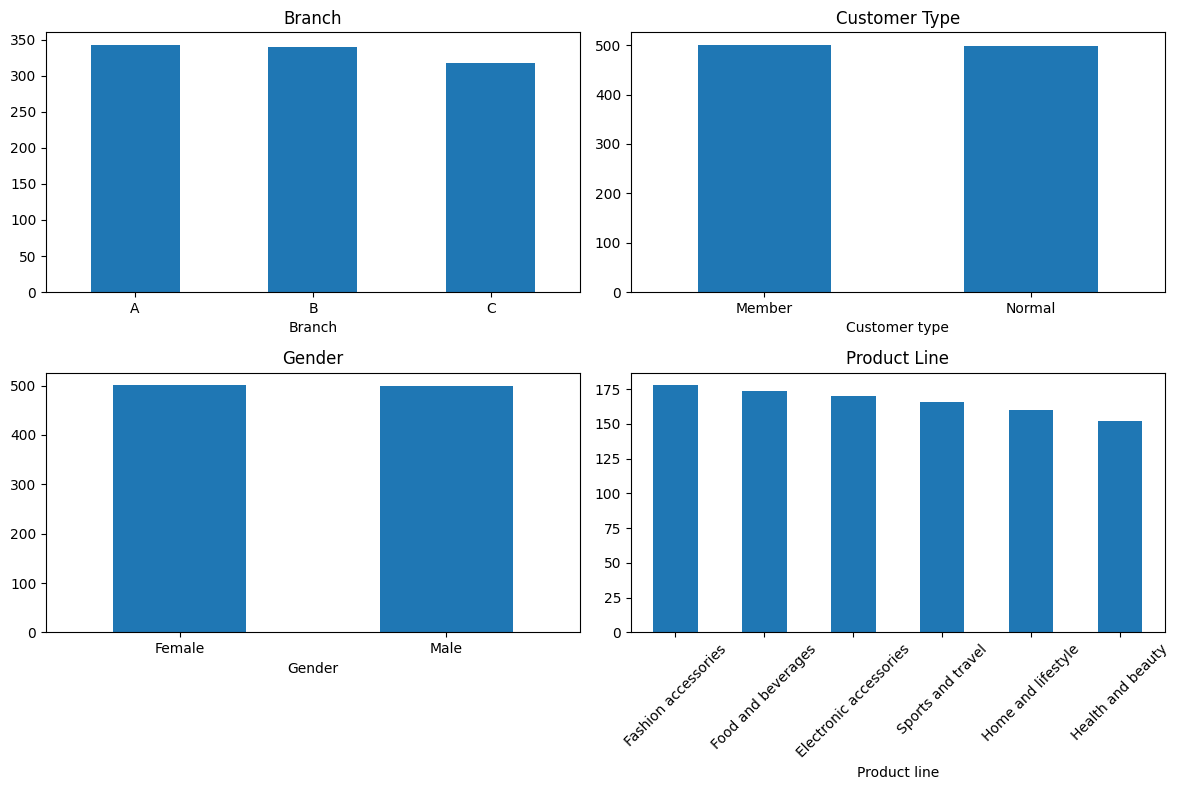

In [17]:
# Count of each category in categorical variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
df['Branch'].value_counts().plot(kind='bar', rot=0)
plt.title("Branch")
plt.subplot(2, 2, 2)
df['Customer type'].value_counts().plot(kind='bar', rot=0)
plt.title("Customer Type")
plt.subplot(2, 2, 3)
df['Gender'].value_counts().plot(kind='bar', rot=0)
plt.title("Gender")
plt.subplot(2, 2, 4)
df['Product line'].value_counts().plot(kind='bar', rot=45)
plt.title("Product Line")
plt.tight_layout()
plt.show()

In [37]:
print("categorical columns:")
for column in df.select_dtypes(include='object'):
    print(column)
    print(df[column].value_counts())
    print()

categorical columns:
Invoice ID
Invoice ID
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64

Branch
Branch
A    343
B    340
C    317
Name: count, dtype: int64

City
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Customer type
Customer type
Member    501
Normal    499
Name: count, dtype: int64

Gender
Gender
Female    501
Male      499
Name: count, dtype: int64

Product line
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Time
Time
19:48:00    7
14:42:00    7
17:38:00    6
17:16:00    5
11:40:00    5
           ..
13:26:00    1
11:17:00    1
14:57:00    1
17:53:00    1
19:12:00    1
Name: count, Length: 506

**Exploratory Data Analysis**

In [38]:
# A. Analyze the performance of sales and revenue at the city and branch level
sales_revenue_city_branch = df.groupby(['City', 'Branch']).agg({'Quantity': 'sum', 'Unit price': 'sum'})
print("Sales and Revenue at City and Branch Level:")
print(sales_revenue_city_branch)

Sales and Revenue at City and Branch Level:
                  Quantity  Unit price
City      Branch                      
Mandalay  A            637     6349.11
          B            664     6623.73
          C            519     5506.04
Naypyitaw A            648     5953.55
          B            604     6298.64
          C            579     6315.57
Yangon    A            598     6342.88
          B            631     6329.25
          C            630     5953.36


In [39]:
# B. What is the average price of an item sold at each branch of the city
avg_price_per_branch_city = df.groupby(['City', 'Branch'])['Unit price'].mean()
print("\nAverage Price of Items Sold at Each Branch of the City:")
print(avg_price_per_branch_city)


Average Price of Items Sold at Each Branch of the City:
City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: Unit price, dtype: float64


In [42]:
#C. Analyze the performance of sales and revenue, Month over Month across the
#Product line, Gender, and Payment Method, and identify the focus areas to
#get better sales for April 2019.

april_2019_data = df[df['Date'].dt.month == 4]

april_performance = april_2019_data.groupby(['Product line', 'Gender', 'Payment']).agg({'Quantity': 'sum', 'Unit price': 'sum'})
print("\nPerformance Analysis for April 2019:")
print(april_performance)



Performance Analysis for April 2019:
Empty DataFrame
Columns: [Quantity, Unit price]
Index: []
